<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example%20Sankey%20Diagramm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sankey diagramm

In [1]:
import plotly.graph_objects as go
import numpy as np
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_power = [1.48711646e-08, -2.97902704e-08, 2.27012944e-08, -3.90742408e-09, -1.59587564e-08, 1.93142363e-08]
mean_power = [x**2 for x in mean_power]
mean_variance = [2.94230489e-10, 2.73464515e-10, 2.57522813e-10, 2.90793371e-10, 2.62333203e-10, 2.61792757e-10]

In [3]:
# Параметры
window_size = 20  # размер окна в секундах
fs = 256  # частота дискретизации
n_windows = 6  # 120 секунд / 10 секунд

# Инициализация массивов для хранения данных
all_power = []
all_variance = []
all_times = []

In [4]:
# Создаем узлы (каждое окно представлено двумя узлами: мощность и дисперсия)
nodes = {
    'label': [f'Окно {i+1} Мощность' for i in range(n_windows)] +
            [f'Окно {i+1} Дисперсия' for i in range(n_windows)],
    'color': ['blue'] * n_windows + ['red'] * n_windows
}

# Создаем связи между узлами
links = {
    'source': [],  # индексы источников (узлов)
    'target': [],  # индексы целей (узлов)
    'value': []    # значения потоков
}

# Связи между окнами мощности
links['source'] = list(range(n_windows - 1))
links['target'] = list(range(1, n_windows))

# Связи между окнами дисперсии (смещены на n_windows)
links['source'] += list(range(n_windows, 2*n_windows - 1))
links['target'] += list(range(n_windows + 1, 2*n_windows))


# Проверка исходных данных перед построением
print("Проверка данных:")
print(f"Средняя мощность по окнам: {mean_power}")
print(f"Средняя дисперсия по окнам: {mean_variance}")
print(f"Сумма мощностей: {np.sum(mean_power):.15f}")
print(f"Сумма дисперсий: {np.sum(mean_variance):.15f}")

Проверка данных:
Средняя мощность по окнам: [2.2115153656029319e-16, 8.874602105051162e-16, 5.153487674354714e-16, 1.5267962940963844e-17, 2.546819058345409e-16, 3.7303972385223775e-16]
Средняя дисперсия по окнам: [2.94230489e-10, 2.73464515e-10, 2.57522813e-10, 2.90793371e-10, 2.62333203e-10, 2.61792757e-10]
Сумма мощностей: 0.000000000000002
Сумма дисперсий: 0.000000001640137


In [5]:
# Если суммы близки к нулю - проблема в данных
if np.sum(mean_power) < 1e-10 or np.sum(mean_variance) < 1e-10:
    print("\nДанные близки к нулю")
    print("1. Правильность выделения временных окон")
    print("2. Корректность расчёта мощности и дисперсии")
    print("3. Не все ли каналы ЭЭГ содержат нулевые значения")


Данные близки к нулю
1. Правильность выделения временных окон
2. Корректность расчёта мощности и дисперсии
3. Не все ли каналы ЭЭГ содержат нулевые значения


In [6]:
    # Альтернативный вариант нормализации - мин-макс scaling
    power_norm = (mean_power - np.min(mean_power)) / (np.max(mean_power) - np.min(mean_power))
    variance_norm = (mean_variance - np.min(mean_variance)) / (np.max(mean_variance) - np.min(mean_variance))

    # Убедимся, что нет нулевых значений после нормализации
    power_norm = np.clip(power_norm, 0.1, None)  # минимальное значение 0.1
    variance_norm = np.clip(variance_norm, 0.1, None)

    print("\nНормализованные значения:")
    print(f"Мощность: {power_norm}")
    print(f"Дисперсия: {variance_norm}")


Нормализованные значения:
Мощность: [0.23605297 1.         0.57336075 0.1        0.27449676 0.41019828]
Дисперсия: [1.         0.43428797 0.1        0.90636514 0.13104589 0.11632292]


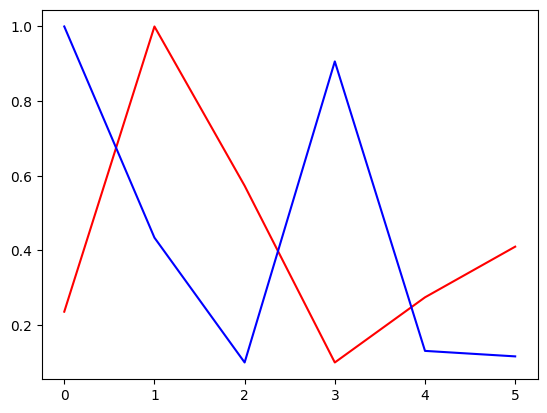

In [7]:
# первое значение - это 120-ая секунда
# последнее значение - это сам приступ
plt.plot(power_norm,'r',variance_norm,'b')

In [8]:
    # Обновляем значения связей
    #links['value'] = list(power_norm[:-1]) + list(variance_norm[:-1])
    links['value'] = list(power_norm) + list(variance_norm)

    # Красивый желтый цвет для всех связей
    link_colors = ['rgba(255, 215, 0, 0.8)'] * len(links['source'])

    # Создаем временные метки от 120 до 0 секунд с шагом window_size
    time_labels = [f"{120 - i*window_size} сек" for i in range(n_windows)]

    # Обновляем метки узлов
    nodes['label'] = [f"{t} Мощность" for t in time_labels] + [f"{t} Дисперсия" for t in time_labels]

In [10]:

    # Создаём улучшенную диаграмму с временными метками
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=20,
            thickness=20,
            line=dict(color="black", width=1),
            label=nodes['label'],
            color=nodes['color'],
            x=[i/(n_windows-1) for i in range(n_windows)]*2,  # равномерное распределение
            y=[0.8]*n_windows + [0.2]*n_windows  # мощность сверху, дисперсия снизу
        ),
        link=dict(
            source=links['source'],
            target=links['target'],
            value=links['value'],
            color=link_colors,  # Желтый цвет для всех связей
            hoverinfo='all',
            hovertemplate='<b>%{source.label}</b> → <b>%{target.label}</b><br>Интенсивность: %{value:.2f}<extra></extra>'
        ),
        arrangement='freeform'  # лучше сохраняет заданные позиции
    ))

    fig.update_layout(
        title_text=f"<b>Динамика параметров ЭЭГ перед приступом ({window_size}сек окна)</b><br>Синий - мощность, Красный - дисперсия, Желтый - связи",
        title_font_size=18,
        font=dict(size=14),
        height=700,
        width=1000,
        plot_bgcolor='white',
        xaxis_title="Время до приступа (сек)",
        annotations=[
            dict(
                x=0.5,
                y=-0.15,
                showarrow=False,
                text="Ось X показывает время до начала приступа (0 сек - момент приступа)",
                xref="paper",
                yref="paper"
            )
        ]
    )

    fig.show()



In [11]:

    # Добавляем обратные связи
    reverse_links = {
        #'source': links['target'][:-1],  # Берем все узлы, кроме последнего (чтобы не выйти за границы)
        #'target': links['source'][:-1],
        #'value': links['value'][:-1]   # Уменьшаем вес обратных связей для наглядности
        'source': links['target'][::-1],  # Берем все узлы, кроме последнего (чтобы не выйти за границы)
        'target': links['source'][::-1],
        'value': links['value'][1:][::-1]   # Уменьшаем вес обратных связей для наглядности
    }

    # Объединяем прямые и обратные связи
    all_links = {
        'source': links['source'] + reverse_links['source'],
        'target': links['target'] + reverse_links['target'],
        'value': links['value'] + reverse_links['value']
    }

    # Разные цвета для прямых и обратных связей
    link_colors = (
        ['rgba(0, 255, 0, 0.6)'] * len(links['source']) +  # Зеленый для прямых связей
        ['rgba(255, 165, 0, 0.4)'] * len(reverse_links['source'])  # Оранжевый для обратных
    )

    fig = go.Figure(go.Sankey(
        node=dict(
            pad=20,
            thickness=20,
            line=dict(color="black", width=1),
            label=nodes['label'],
            color=nodes['color'],
            x=[i/(n_windows-1) for i in range(n_windows)]*2,
            y=[0.8]*n_windows + [0.2]*n_windows
        ),
        link=dict(
            source=all_links['source'],
            target=all_links['target'],
            value=all_links['value'],
            color=link_colors,
            hoverinfo='all',
            hovertemplate='<b>%{source.label}</b> → <b>%{target.label}</b><br>Интенсивность: %{value:.2f}<extra></extra>'
        ),
        arrangement='freeform'
    ))

    fig.update_layout(
        title_text=f"<b>Динамика параметров ЭЭГ перед приступом ({window_size}сек окна)</b><br>"
                   "Синий - мощность, Красный - дисперсия<br>"
                   "Зеленый → прямые связи, Оранжевый ← обратные",
        title_font_size=18,
        font=dict(size=14),
        height=700,
        width=1000,
        plot_bgcolor='white',
        annotations=[
            dict(
                x=0.5,
                y=-0.15,
                showarrow=False,
                text="Ось X показывает время до начала приступа (0 сек - момент приступа)",
                xref="paper",
                yref="paper"
            )
        ]
    )

    fig.show()



# One Sankey Diagramm for Power and Variance

In [13]:
# Параметры
window_size = 20  # размер окна в секундах
fs = 256  # частота дискретизации
n_windows = 7  # 120 секунд / 10 секунд

# Инициализация массивов для хранения данных
all_power = []
all_variance = []
all_times = []

In [14]:
# Создаем узлы (каждое окно представлено двумя узлами: мощность и дисперсия)
nodes = {
    'label': [f'Окно {i+1} Мощность' for i in range(n_windows)] +
            [f'Окно {i+1} Дисперсия' for i in range(n_windows)],
    'color': ['blue'] * n_windows + ['red'] * n_windows
}

# Создаем связи между узлами
links = {
    'source': [],  # индексы источников (узлов)
    'target': [],  # индексы целей (узлов)
    'value': []    # значения потоков
}

# Связи между окнами мощности
links['source'] = list(range(n_windows - 1))
links['target'] = list(range(1, n_windows))


# Проверка исходных данных перед построением
print("Проверка данных:")
print(f"Средняя мощность по окнам: {mean_power}")
print(f"Средняя дисперсия по окнам: {mean_variance}")
print(f"Сумма мощностей: {np.sum(mean_power):.15f}")
print(f"Сумма дисперсий: {np.sum(mean_variance):.15f}")

Проверка данных:
Средняя мощность по окнам: [2.2115153656029319e-16, 8.874602105051162e-16, 5.153487674354714e-16, 1.5267962940963844e-17, 2.546819058345409e-16, 3.7303972385223775e-16]
Средняя дисперсия по окнам: [2.94230489e-10, 2.73464515e-10, 2.57522813e-10, 2.90793371e-10, 2.62333203e-10, 2.61792757e-10]
Сумма мощностей: 0.000000000000002
Сумма дисперсий: 0.000000001640137


In [15]:
    # Обновляем значения связей
    #links['value'] = list(power_norm[:-1]) + list(variance_norm[:-1])
    links['value'] = list(power_norm)

    # Красивый желтый цвет для всех связей
    link_colors = ['rgba(255, 215, 0, 0.8)'] * len(links['source'])

    # Создаем временные метки от 120 до 0 секунд с шагом window_size
    time_labels = [f"{120 - i*window_size} сек" for i in range(n_windows)]

    # Обновляем метки узлов
    nodes['label'] = [f"{t} Мощность" for t in time_labels] + [f"{t} Дисперсия" for t in time_labels]

In [29]:
list(variance_norm)

[np.float64(1.0),
 np.float64(0.434287967454001),
 np.float64(0.1),
 np.float64(0.9063651428110024),
 np.float64(0.13104588805894404),
 np.float64(0.11632291839995525)]

In [30]:
all_links

{'source': [0, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1],
 'target': [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1, 0],
 'value': [np.float64(0.2360529736354782),
  np.float64(1.0),
  np.float64(0.5733607537685952),
  np.float64(0.1),
  np.float64(0.27449675637705945),
  np.float64(0.4101982812968751),
  np.float64(1.0),
  np.float64(0.434287967454001),
  np.float64(0.1),
  np.float64(0.9063651428110024),
  np.float64(0.13104588805894404),
  np.float64(0.11632291839995525)]}

In [31]:

    # Добавляем обратные связи
    reverse_links = {
        #'source': links['target'][:-1],  # Берем все узлы, кроме последнего (чтобы не выйти за границы)
        #'target': links['source'][:-1],
        #'value': links['value'][:-1]   # Уменьшаем вес обратных связей для наглядности
        'source': links['target'][::-1],  # Берем все узлы, кроме последнего (чтобы не выйти за границы)
        'target': links['source'][::-1],
        'value': list(variance_norm)[::-1]   # Уменьшаем вес обратных связей для наглядности
    }

    # Объединяем прямые и обратные связи
    all_links = {
        'source': links['source'] + reverse_links['source'],
        'target': links['target'] + reverse_links['target'],
        'value': links['value'] + reverse_links['value']
    }

    # Разные цвета для прямых и обратных связей
    link_colors = (
        ['rgba(0, 255, 0, 0.6)'] * len(links['source']) +  # Зеленый для прямых связей
        ['rgba(255, 165, 0, 0.4)'] * len(reverse_links['source'])  # Оранжевый для обратных
    )

    fig = go.Figure(go.Sankey(
        node=dict(
            pad=20,
            thickness=20,
            line=dict(color="black", width=1),
            label=nodes['label'],
            color=nodes['color'],
            x=[i/(n_windows-1) for i in range(n_windows)],
            y=[0.5]*n_windows
        ),
        link=dict(
            source=all_links['source'],
            target=all_links['target'],
            value=all_links['value'],
            color=link_colors,
            hoverinfo='all',
            hovertemplate='<b>%{source.label}</b> → <b>%{target.label}</b><br>Интенсивность: %{value:.2f}<extra></extra>'
        ),
        arrangement='freeform'
    ))

    fig.update_layout(
        title_text=f"<b>Динамика параметров ЭЭГ перед приступом ({window_size}сек окна)</b><br>"
                   "Синий - временная точка до приступа<br>"
                   "Зеленый → прямые связи, показыают мощность, Оранжевый ← показывают дисперсию",
        title_font_size=18,
        font=dict(size=14),
        height=700,
        width=1000,
        plot_bgcolor='white',
        annotations=[
            dict(
                x=0.5,
                y=-0.15,
                showarrow=False,
                text="Ось X показывает время до начала приступа (0 сек - момент приступа)",
                xref="paper",
                yref="paper"
            )
        ]
    )

    fig.show()

